In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
prospects = pd.read_csv("Top100Prospects.csv")

In [3]:
prospects

,#,Player,CO,Pos,Age,HT,WT,WS,Pts,Reb,Ast,PER,Team,League
0,1,Zaccharie Risacher,NaN,SF,19.1,"6'10""",193,-,4.4,1.8,0.1,13.3,NaN,France Espoirs
1,2,Alex Sarr,NaN,PF/C,19.0,"7'1""",217,-,6.6,4.0,0.7,13.9,NaN,Overtime Elite
2,3,Donovan Clingan,NaN,C,20.2,"7'2""",280,-,6.9,5.6,0.5,33.9,NaN,NCAA
3,4,Robert Dillingham,NaN,PG,19.3,"6'2""",176,-,19.5,3.5,2.9,25.0,NaN,Nike EYBL U-16
4,5,Nikola Topic,NaN,PG,18.7,"6'7""",203,-,2.0,1.0,3.0,-0.5,NaN,Adriatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,David Jones,NaN,SF,22.4,"6'6""",195,-,20.8,10.3,1.3,28.4,NaN,Nike EYBL U-16
96,97,Jonas Aidoo,NaN,C,21.4,"6'11""",234,-,2.1,2.2,0.2,15.3,NaN,NCAA
97,98,Bronny James,NaN,PG/SG,19.6,"6'3""",204,-,5.0,0.3,1.7,5.7,NaN,Nike EYBL U-15
98,99,Michael Ajayi,NaN,SF/PF,20.9,"6'7""",220,-,17.5,10.2,1.9,21.9,NaN,NCAA


In [20]:
teams = pd.read_csv("DraftNeeds.csv")
teams

,Team,Pos,Needs
0,Detroit Pistons,SF,Shooting/Defense
1,Washington Wizards,PF/C,Scoring Big
2,Portland Trail Blazers,C,Raw Talent
3,Charlotte Hornets,PG,Shooting
4,San Antonio Spurs,PG,Playmaker
5,Toronto Raptors,SF/PF,Defensive Forward
6,Memphis Grizzlies,PG/SG,Scoring Guard
7,Utah Jazz,PG/SG,Defensive/Playmaker Guard
8,Houston Rockets,SF,Shooting
9,Atlanta Hawks,SG/SF,3 and D forward


In [11]:
teams
print(prospects['Pos'].unique())

['SF' 'PF/C' 'C' 'PG' 'SF/PF' 'PG/SG' 'SG/SF' 'PF' 'SG']


In [13]:
prospects['Pos'] = prospects['Pos'].map({'SF':1, 'PF/C':2, 'C':3, 'PG':4, 'SF/PF':5, 'PG/SG':6, 'SG/SF':7, 'PF':8, 'SG':9})

In [14]:
prospects

,#,Player,CO,Pos,Age,HT,WT,WS,Pts,Reb,Ast,PER,Team,League
0,1,Zaccharie Risacher,NaN,1,19.1,"6'10""",193,-,4.4,1.8,0.1,13.3,NaN,France Espoirs
1,2,Alex Sarr,NaN,2,19.0,"7'1""",217,-,6.6,4.0,0.7,13.9,NaN,Overtime Elite
2,3,Donovan Clingan,NaN,3,20.2,"7'2""",280,-,6.9,5.6,0.5,33.9,NaN,NCAA
3,4,Robert Dillingham,NaN,4,19.3,"6'2""",176,-,19.5,3.5,2.9,25.0,NaN,Nike EYBL U-16
4,5,Nikola Topic,NaN,4,18.7,"6'7""",203,-,2.0,1.0,3.0,-0.5,NaN,Adriatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,David Jones,NaN,1,22.4,"6'6""",195,-,20.8,10.3,1.3,28.4,NaN,Nike EYBL U-16
96,97,Jonas Aidoo,NaN,3,21.4,"6'11""",234,-,2.1,2.2,0.2,15.3,NaN,NCAA
97,98,Bronny James,NaN,6,19.6,"6'3""",204,-,5.0,0.3,1.7,5.7,NaN,Nike EYBL U-15
98,99,Michael Ajayi,NaN,5,20.9,"6'7""",220,-,17.5,10.2,1.9,21.9,NaN,NCAA


In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

x = prospects[['Pos', 'Age', 'WT', 'Pts', 'Reb', 'Ast', 'PER']]


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=22, random_state=0)
kmeans.fit(x_scaled)

# Output the cluster labels
prospects['Cluster_Labels'] = kmeans.labels_

# Print centroids
centroids = kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centroids)

# Save or display the results
print(prospects['Cluster_Labels'])

Centroids of the clusters:
[[ 0.91306724 -0.31728416 -1.02350573 -0.75864767 -0.60560269 -0.37080288
  -0.07743191]
 [ 0.75075729 -0.75845426 -0.08644205  0.7068018   1.10601848  0.10235421
   0.60987321]
 [-0.0755479  -0.13141046  0.58359994 -1.10890789 -0.87946208 -0.84395997
  -0.57098111]
 [-0.1935915   0.79123969 -0.78302036 -0.01948207 -0.44377669  0.50480967
  -0.13274043]
 [-1.00809234 -0.66529347  0.88744077 -0.67706342 -0.12634876 -0.88094236
   0.80292457]
 [-1.0494076   0.36462597  1.57124848  0.87733129  1.38221189 -0.12334716
   1.15556036]
 [-1.4625602   1.20329704  0.32708222 -0.21904656 -0.27883865 -0.43425306
  -0.13908153]
 [ 0.23136546 -0.92865186 -0.3756879  -0.87973588 -0.94543729  0.09365247
  -1.3237405 ]
 [-0.4296787  -0.8032431  -0.29209851  1.7361129   0.26576809  1.95147388
   1.04459105]
 [-0.8428313   0.51354887  4.39819546 -1.5186694  -1.60767908 -1.09413498
  -1.62360422]
 [ 0.67206156  0.9106766  -1.143472    0.0271375  -0.19896299 -0.53577336
  -0.4136

/Users/ruhiaggarwal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
prospects.sort_values(by='Cluster_Labels')

np.where(prospects['Cluster_Labels'] == 0)

(array([27, 47, 84, 86]),)

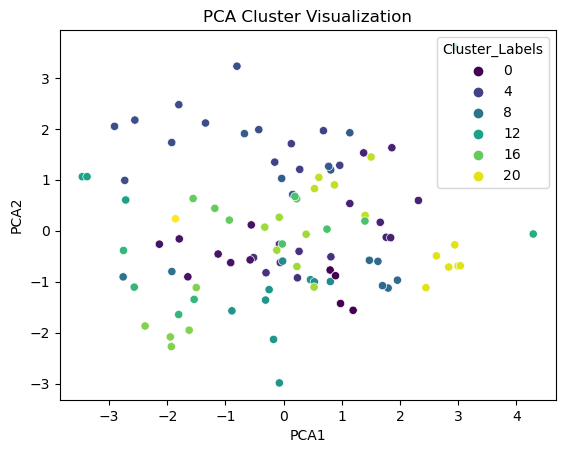

In [23]:
from sklearn.decomposition import PCA

# Reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for easy visualization
x_pca = pca.fit_transform(x_scaled)

# Adding PCA results back to dataframe for plotting
prospects['PCA1'] = x_pca[:, 0]
prospects['PCA2'] = x_pca[:, 1]

# Plotting
sns.scatterplot(data=prospects, x='PCA1', y='PCA2', hue='Cluster_Labels', palette='viridis')
plt.title('PCA Cluster Visualization')
plt.show()